**Outliers Identification Using AI**

Isolation Forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

In [3]:
df_raw=pd.read_csv('creditcard.csv')
df=df_raw.drop(['Time'],axis=1)

In [4]:
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# This list contains the names of features (columns) to be used in the dataset.


Detecting Outliers Using Isolation Forest

In [5]:
from sklearn.ensemble import IsolationForest

df5=df.copy()
df5=df5.drop(['Class'],axis=1)
df5.dropna(inplace=True)


In [6]:
model=IsolationForest(n_estimators=150,max_samples='auto',contamination=float(0.1),max_features=1.0)
model.fit(df5)

IsolationForest(contamination=0.1, n_estimators=150)

In [7]:
scores=model.decision_function(df5)
anomaly=model.predict(df5)

df5['scores']=scores
df5['anomaly']=anomaly

df5.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.080172,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.092396,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.001752,-1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.058970,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.072943,1
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.093836,1
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.079905,1
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.027491,-1
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.075472,1
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.085419,1


In [8]:
anomaly=df.loc[df5['anomaly']==-1]
anomaly_index=list(anomaly.index)
print('Total number of outliers is:',len(anomaly))

Total number of outliers is: 28481


In [9]:
df5[df5['anomaly']==-1].head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.001752,-1
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,-0.027491,-1
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,-0.044919,-1
51,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,-0.073018,-1
69,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,1.410889,...,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,35.00,-0.021350,-1
82,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,-0.086826,-1
83,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,-0.078942,...,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,-0.020810,-1
85,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,...,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,-0.034302,-1
89,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,0.017276,...,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,-0.007477,-1
102,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,0.127497,...,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,-0.004388,-1


In [10]:
df_out5=df5.drop(anomaly_index,axis=0).reset_index(drop=True)

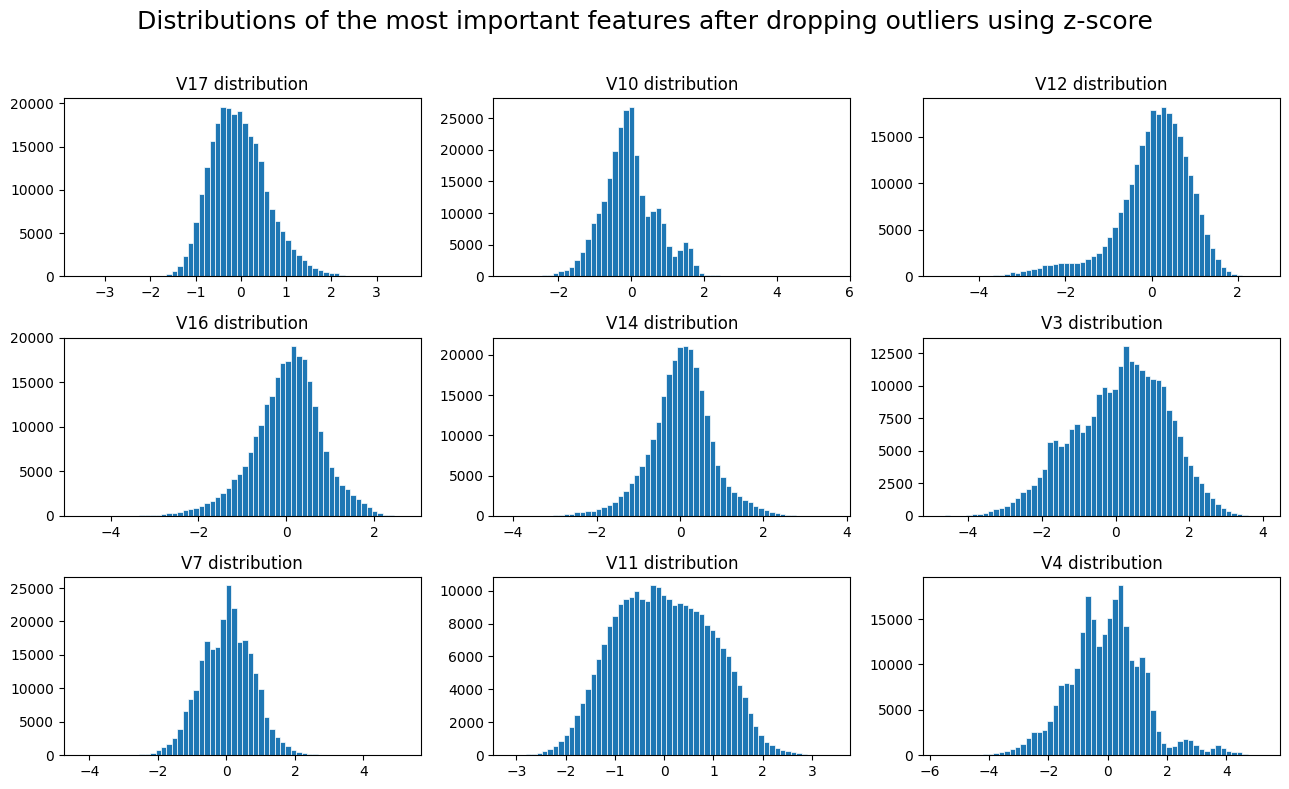

In [11]:
# Checking distributions of the most important features after dropping outliers
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(13,8))
fig.suptitle('Distributions of the most important features after dropping outliers using z-score\n',size=18)

axes[0,0].hist(df_out5['V17'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,0].set_title('V17 distribution')

axes[0,1].hist(df_out5['V10'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,1].set_title('V10 distribution')

axes[0,2].hist(df_out5['V12'],bins=60,linewidth=0.5,edgecolor='white')
axes[0,2].set_title('V12 distribution')

axes[1,0].hist(df_out5['V16'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,0].set_title('V16 distribution')

axes[1,1].hist(df_out5['V14'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,1].set_title('V14 distribution')

axes[1,2].hist(df_out5['V3'],bins=60,linewidth=0.5,edgecolor='white')
axes[1,2].set_title('V3 distribution')

axes[2,0].hist(df_out5['V7'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,0].set_title('V7 distribution')

axes[2,1].hist(df_out5['V11'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,1].set_title('V11 distribution')

axes[2,2].hist(df_out5['V4'],bins=60,linewidth=0.5,edgecolor='white')
axes[2,2].set_title('V4 distribution')

plt.tight_layout()

